# configure environment

In [0]:
%%capture 
! pip install numpy torchvision_nightly
! pip install torch_nightly -f https://download.pytorch.org/whl/nightly/cu92/torch_nightly.html

In [2]:
import sys
sys.version_info

sys.version_info(major=3, minor=6, micro=6, releaselevel='final', serial=0)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
workspace_path = "/content/drive/My Drive/workspace/pytorch/"

In [0]:
data_dir = f'{workspace_path}datasets/'

In [6]:
import torch
import torchvision

torch.__version__, torchvision.__version__

('0.4.1', '0.2.1')

In [0]:
from torch.nn import Module, Sequential
from torch.nn import Conv2d, BatchNorm2d, ReLU, MaxPool2d, Linear
from torch.nn import CrossEntropyLoss

from torch.optim import Adam
from torch.utils.data import DataLoader

from torchvision.datasets import CIFAR10
from torchvision.transforms.transforms import ToTensor
from torchvision.utils import make_grid

In [0]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# load dataset

In [10]:
trainset = CIFAR10(
    root=data_dir,
    train=True,
    download=True,
    transform=ToTensor())

testset = CIFAR10(
    root=data_dir,
    train=False,
    download=True,
    transform=ToTensor())

Files already downloaded and verified
Files already downloaded and verified


In [11]:
trainset

Dataset CIFAR10
    Number of datapoints: 50000
    Split: train
    Root Location: /content/drive/My Drive/workspace/pytorch/datasets/
    Transforms (if any): ToTensor()
    Target Transforms (if any): None

In [12]:
testset

Dataset CIFAR10
    Number of datapoints: 10000
    Split: test
    Root Location: /content/drive/My Drive/workspace/pytorch/datasets/
    Transforms (if any): ToTensor()
    Target Transforms (if any): None

In [0]:
trainloader = DataLoader(
    trainset,
    batch_size=8,
    shuffle=True,
    num_workers=2)

In [0]:
testloader = DataLoader(
    testset,
    batch_size=8,
    shuffle=False,
    num_workers=2)

In [0]:
labels = (
    'plane', 'car', 'bird', 'cat','deer', 
    'dog', 'frog', 'horse', 'ship', 'truck'
)

# examining the datasets


In [0]:
images_batch, labels_batch = iter(trainloader).next()

In [17]:
images_batch.shape

torch.Size([8, 3, 32, 32])

In [0]:
img = make_grid(images_batch)

In [19]:
img.shape

torch.Size([3, 36, 274])

In [20]:
np.transpose(img, (1,2,0)).shape

torch.Size([36, 274, 3])

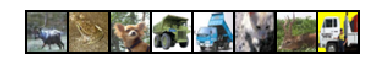

In [21]:
plt.imshow(np.transpose(img, (1,2,0)));
plt.axis('off')
plt.show()

# define the model

In [0]:
input_size = 3
conv1_size = 16
conv2_size = 32
output_size = len(labels)
kernel_size = 5 

In [0]:
class ConvNet(Module):
  
    def __init__(self):
        super(ConvNet, self).__init__()

        self.layer1 = Sequential(
            Conv2d(input_size, conv1_size, kernel_size),
            BatchNorm2d(conv1_size),
            ReLU(),
            MaxPool2d(kernel_size=2))

        self.layer2 = Sequential(
            Conv2d(conv1_size, conv2_size, kernel_size),
            BatchNorm2d(conv2_size),
            ReLU(),
            MaxPool2d(kernel_size=2))

        self.fc = Linear(conv2_size *  kernel_size * kernel_size, output_size)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)

        return out

In [0]:
model = ConvNet()

In [0]:
learning_rate = 0.001
criterion = CrossEntropyLoss()
optimizer = Adam(model.parameters(), lr=learning_rate)

# train the model

In [0]:
total_step = len(trainloader)
num_epochs = 5

In [27]:
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(trainloader):
        
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 2000 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

Epoch [1/5], Step [2000/6250], Loss: 1.4316
Epoch [1/5], Step [4000/6250], Loss: 1.2153
Epoch [1/5], Step [6000/6250], Loss: 1.0047
Epoch [2/5], Step [2000/6250], Loss: 0.8696
Epoch [2/5], Step [4000/6250], Loss: 0.8217
Epoch [2/5], Step [6000/6250], Loss: 0.8828
Epoch [3/5], Step [2000/6250], Loss: 0.9352
Epoch [3/5], Step [4000/6250], Loss: 0.5496
Epoch [3/5], Step [6000/6250], Loss: 1.4407
Epoch [4/5], Step [2000/6250], Loss: 1.5836
Epoch [4/5], Step [4000/6250], Loss: 0.5808
Epoch [4/5], Step [6000/6250], Loss: 1.1623
Epoch [5/5], Step [2000/6250], Loss: 0.4777
Epoch [5/5], Step [4000/6250], Loss: 0.6470
Epoch [5/5], Step [6000/6250], Loss: 2.0147


# Evaluate the model

In [28]:
model.eval()  

ConvNet(
  (layer1): Sequential(
    (0): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Linear(in_features=800, out_features=10, bias=True)
)

In [29]:
with torch.no_grad():
    correct = 0
    total = 0
    
    for images, labels in testloader:

        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the model on the 10000 test images: {}%'\
          .format(100 * correct / total))

Accuracy of the model on the 10000 test images: 69.85%
